# Experimento 2: classificação com SVM

- Classificador SVM usando atributos FS20, 30 realizações.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

## Carregando dados

In [2]:
# sns.set(style='ticks', rc={'figure.figsize':(14, 7)})

# sns.countplot(
#     data=fs20_df,
#     x='target',
#     hue='frequence'
#     ).set(
#         xticklabels=TARGET_LABELS)

# fs20_df.value_counts(
#     subset=['target', 'frequence'],
#     sort=False)

## Classificação

seeds: [7359  184 3174 1406 3911 7185 2593 1351 4782 2188 2865 1074 2583 6736
 3348 3293 2139 7759 3500 2674    1 1900 6965 6796  344 4241 3793 2365
 3555 7399]
Rodada: 0 - seed: 7359

              precision    recall  f1-score   support

      Normal       0.94      1.00      0.97        66
        HI-1       0.84      0.76      0.80        91
        HI-2       1.00      0.73      0.85        83
        HI-3       0.77      0.93      0.84        61
        LI-1       0.71      0.79      0.75        80
        LI-2       0.93      1.00      0.96        64
        LI-3       1.00      1.00      1.00        74

    accuracy                           0.87       519
   macro avg       0.88      0.89      0.88       519
weighted avg       0.88      0.87      0.87       519



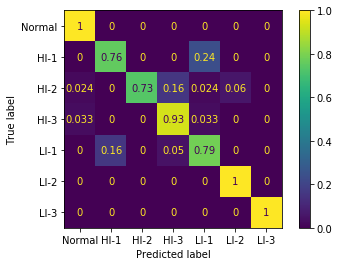

Rodada: 1 - seed: 184

              precision    recall  f1-score   support

      Normal       0.88      0.99      0.93        68
        HI-1       0.73      0.83      0.78        78
        HI-2       0.97      0.74      0.84        80
        HI-3       0.84      0.88      0.86        76
        LI-1       0.76      0.69      0.72        61
        LI-2       0.96      0.99      0.97        79
        LI-3       1.00      1.00      1.00        77

    accuracy                           0.88       519
   macro avg       0.88      0.87      0.87       519
weighted avg       0.88      0.88      0.88       519



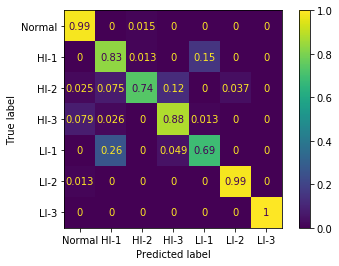

Rodada: 2 - seed: 3174

              precision    recall  f1-score   support

      Normal       0.91      0.94      0.93        68
        HI-1       0.68      0.79      0.73        72
        HI-2       0.97      0.79      0.87        89
        HI-3       0.90      0.92      0.91        77
        LI-1       0.75      0.69      0.72        74
        LI-2       0.91      1.00      0.95        68
        LI-3       1.00      1.00      1.00        71

    accuracy                           0.87       519
   macro avg       0.87      0.88      0.87       519
weighted avg       0.88      0.87      0.87       519



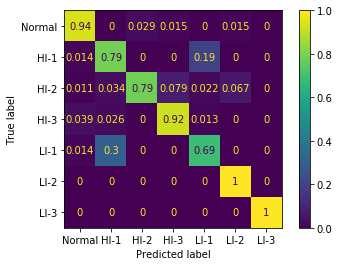

Rodada: 3 - seed: 1406

              precision    recall  f1-score   support

      Normal       0.83      0.95      0.88        55
        HI-1       0.67      0.82      0.74        74
        HI-2       0.89      0.71      0.79        82
        HI-3       0.88      0.88      0.88        86
        LI-1       0.79      0.64      0.71        72
        LI-2       0.93      1.00      0.96        75
        LI-3       1.00      1.00      1.00        75

    accuracy                           0.85       519
   macro avg       0.86      0.86      0.85       519
weighted avg       0.86      0.85      0.85       519



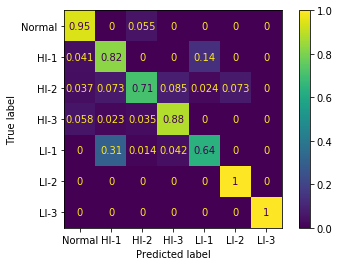

Rodada: 4 - seed: 3911

              precision    recall  f1-score   support

      Normal       0.94      0.88      0.91        74
        HI-1       0.73      0.82      0.77        82
        HI-2       0.98      0.72      0.83        76
        HI-3       0.76      0.96      0.85        70
        LI-1       0.72      0.63      0.67        73
        LI-2       0.93      1.00      0.96        77
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.86       519
   macro avg       0.87      0.86      0.86       519
weighted avg       0.86      0.86      0.85       519



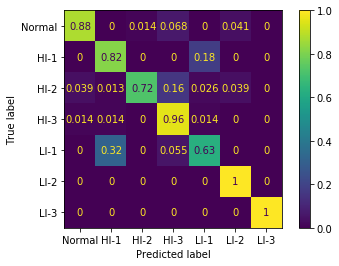

Rodada: 5 - seed: 7185

              precision    recall  f1-score   support

      Normal       0.88      0.98      0.93        64
        HI-1       0.72      0.81      0.76        88
        HI-2       0.97      0.76      0.85        75
        HI-3       0.94      0.92      0.93        88
        LI-1       0.75      0.69      0.72        75
        LI-2       0.91      0.99      0.95        70
        LI-3       1.00      1.00      1.00        59

    accuracy                           0.87       519
   macro avg       0.88      0.88      0.88       519
weighted avg       0.88      0.87      0.87       519



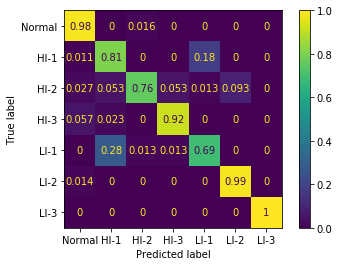

Rodada: 6 - seed: 2593

              precision    recall  f1-score   support

      Normal       0.89      0.91      0.90        69
        HI-1       0.74      0.89      0.81        66
        HI-2       0.79      0.74      0.76        74
        HI-3       0.82      0.80      0.81        83
        LI-1       0.88      0.72      0.79        85
        LI-2       0.89      1.00      0.94        57
        LI-3       1.00      1.00      1.00        85

    accuracy                           0.86       519
   macro avg       0.86      0.87      0.86       519
weighted avg       0.86      0.86      0.86       519



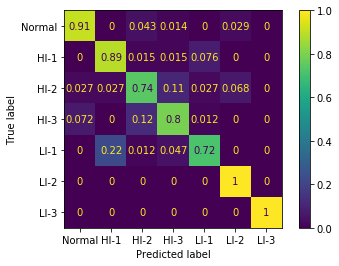

Rodada: 7 - seed: 1351

              precision    recall  f1-score   support

      Normal       0.89      0.95      0.92        65
        HI-1       0.69      0.84      0.76        74
        HI-2       0.94      0.79      0.86        80
        HI-3       0.87      0.94      0.90        80
        LI-1       0.82      0.58      0.68        73
        LI-2       0.90      1.00      0.95        69
        LI-3       1.00      1.00      1.00        78

    accuracy                           0.87       519
   macro avg       0.87      0.87      0.87       519
weighted avg       0.87      0.87      0.87       519



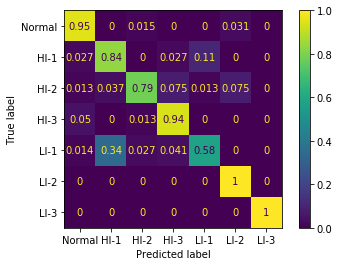

Rodada: 8 - seed: 4782

              precision    recall  f1-score   support

      Normal       0.95      0.92      0.93        76
        HI-1       0.65      0.88      0.75        77
        HI-2       0.89      0.66      0.76        77
        HI-3       0.79      0.90      0.84        61
        LI-1       0.82      0.60      0.69        84
        LI-2       0.88      0.99      0.93        71
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.84       519
   macro avg       0.85      0.85      0.84       519
weighted avg       0.85      0.84      0.84       519



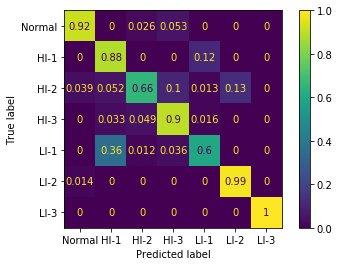

Rodada: 9 - seed: 2188

              precision    recall  f1-score   support

      Normal       0.90      0.96      0.93        76
        HI-1       0.69      0.82      0.75        74
        HI-2       0.95      0.73      0.83        75
        HI-3       0.88      0.94      0.91        69
        LI-1       0.80      0.65      0.72        74
        LI-2       0.92      1.00      0.96        69
        LI-3       1.00      1.00      1.00        82

    accuracy                           0.87       519
   macro avg       0.88      0.87      0.87       519
weighted avg       0.88      0.87      0.87       519



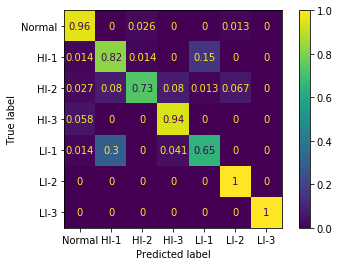

Rodada: 10 - seed: 2865

              precision    recall  f1-score   support

      Normal       0.95      0.98      0.96        84
        HI-1       0.68      0.85      0.75        71
        HI-2       0.84      0.92      0.88        62
        HI-3       0.95      0.90      0.92        82
        LI-1       0.80      0.58      0.68        77
        LI-2       1.00      1.00      1.00        70
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.89       519
   macro avg       0.89      0.89      0.89       519
weighted avg       0.89      0.89      0.89       519



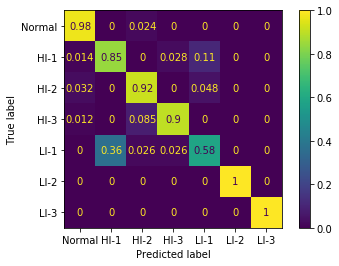

Rodada: 11 - seed: 1074

              precision    recall  f1-score   support

      Normal       0.91      1.00      0.95        59
        HI-1       0.61      0.90      0.73        68
        HI-2       0.97      0.84      0.90        75
        HI-3       0.96      0.87      0.91        84
        LI-1       0.87      0.61      0.72        75
        LI-2       0.95      0.97      0.96        74
        LI-3       1.00      1.00      1.00        84

    accuracy                           0.88       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.90      0.88      0.88       519



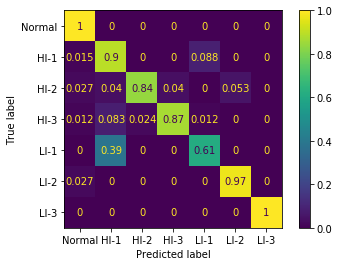

Rodada: 12 - seed: 2583

              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99        67
        HI-1       0.63      0.85      0.72        80
        HI-2       0.98      0.80      0.88        80
        HI-3       0.94      0.92      0.93        73
        LI-1       0.79      0.60      0.68        82
        LI-2       0.91      1.00      0.95        67
        LI-3       1.00      1.00      1.00        70

    accuracy                           0.87       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.88      0.87      0.87       519



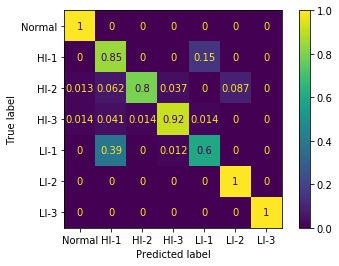

Rodada: 13 - seed: 6736

              precision    recall  f1-score   support

      Normal       0.88      0.98      0.93        86
        HI-1       0.74      0.88      0.80        72
        HI-2       0.95      0.62      0.75        68
        HI-3       0.81      0.89      0.85        80
        LI-1       0.80      0.66      0.73        62
        LI-2       0.94      1.00      0.97        78
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.87       519
   macro avg       0.88      0.86      0.86       519
weighted avg       0.88      0.87      0.87       519



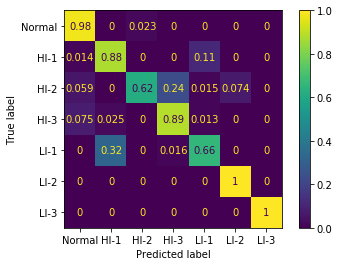

Rodada: 14 - seed: 3348

              precision    recall  f1-score   support

      Normal       0.94      0.91      0.93        55
        HI-1       0.74      0.89      0.81        81
        HI-2       0.97      0.77      0.86        88
        HI-3       0.83      0.98      0.90        83
        LI-1       0.85      0.66      0.75        80
        LI-2       0.89      0.99      0.94        69
        LI-3       1.00      1.00      1.00        63

    accuracy                           0.88       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.88      0.88      0.87       519



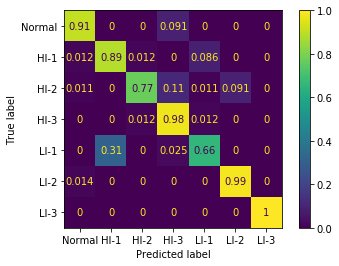

Rodada: 15 - seed: 3293

              precision    recall  f1-score   support

      Normal       0.92      0.97      0.94        68
        HI-1       0.80      0.89      0.84        85
        HI-2       0.96      0.79      0.87        67
        HI-3       0.82      0.91      0.86        75
        LI-1       0.84      0.67      0.75        70
        LI-2       0.95      1.00      0.97        75
        LI-3       1.00      1.00      1.00        79

    accuracy                           0.89       519
   macro avg       0.90      0.89      0.89       519
weighted avg       0.90      0.89      0.89       519



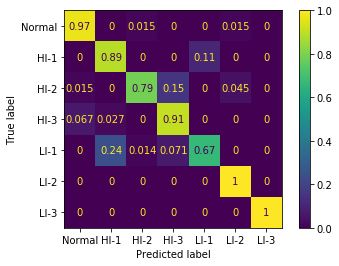

Rodada: 16 - seed: 2139

              precision    recall  f1-score   support

      Normal       0.93      0.97      0.95        72
        HI-1       0.63      0.90      0.74        70
        HI-2       0.94      0.74      0.83        66
        HI-3       0.89      0.90      0.90        84
        LI-1       0.86      0.60      0.71        85
        LI-2       0.92      1.00      0.96        66
        LI-3       1.00      1.00      1.00        76

    accuracy                           0.87       519
   macro avg       0.88      0.87      0.87       519
weighted avg       0.88      0.87      0.87       519



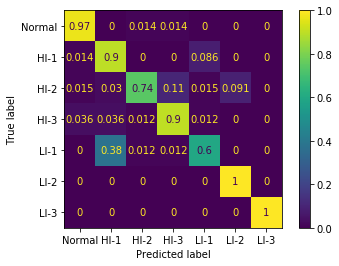

Rodada: 17 - seed: 7759

              precision    recall  f1-score   support

      Normal       0.93      0.92      0.92        83
        HI-1       0.75      0.88      0.81        74
        HI-2       0.82      0.84      0.83        67
        HI-3       0.91      0.81      0.86        78
        LI-1       0.84      0.70      0.77        77
        LI-2       0.88      1.00      0.94        65
        LI-3       1.00      1.00      1.00        75

    accuracy                           0.87       519
   macro avg       0.88      0.88      0.87       519
weighted avg       0.88      0.87      0.87       519



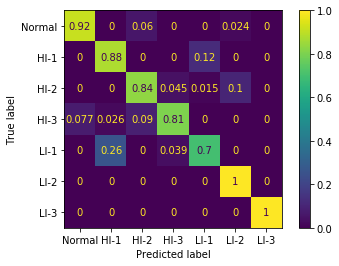

Rodada: 18 - seed: 3500

              precision    recall  f1-score   support

      Normal       0.97      0.88      0.92        64
        HI-1       0.76      0.87      0.81        85
        HI-2       0.90      0.88      0.89        78
        HI-3       0.88      0.90      0.89        70
        LI-1       0.83      0.68      0.75        72
        LI-2       0.92      0.99      0.95        80
        LI-3       1.00      1.00      1.00        70

    accuracy                           0.89       519
   macro avg       0.89      0.89      0.89       519
weighted avg       0.89      0.89      0.89       519



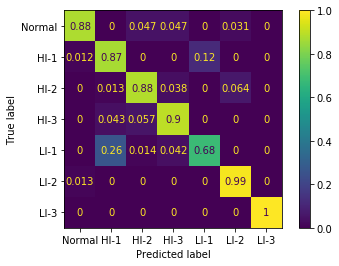

Rodada: 19 - seed: 2674

              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99        74
        HI-1       0.67      0.89      0.77        74
        HI-2       0.97      0.77      0.86        84
        HI-3       0.91      0.96      0.94        78
        LI-1       0.85      0.62      0.72        71
        LI-2       0.92      1.00      0.96        68
        LI-3       1.00      1.00      1.00        70

    accuracy                           0.89       519
   macro avg       0.90      0.89      0.89       519
weighted avg       0.90      0.89      0.89       519



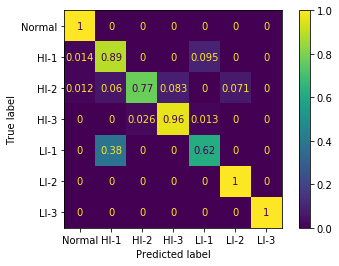

Rodada: 20 - seed: 1

              precision    recall  f1-score   support

      Normal       0.85      0.98      0.91        61
        HI-1       0.69      0.88      0.77        83
        HI-2       0.98      0.76      0.86        72
        HI-3       0.90      0.87      0.88        79
        LI-1       0.84      0.62      0.71        78
        LI-2       0.93      1.00      0.96        74
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.87       519
   macro avg       0.88      0.87      0.87       519
weighted avg       0.88      0.87      0.87       519



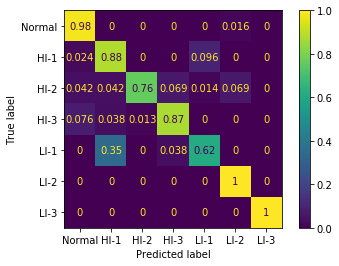

Rodada: 21 - seed: 1900

              precision    recall  f1-score   support

      Normal       0.97      0.91      0.94        79
        HI-1       0.73      0.84      0.78        74
        HI-2       0.96      0.83      0.89        81
        HI-3       0.80      0.99      0.88        68
        LI-1       0.80      0.63      0.71        71
        LI-2       0.95      1.00      0.98        81
        LI-3       1.00      1.00      1.00        65

    accuracy                           0.88       519
   macro avg       0.89      0.89      0.88       519
weighted avg       0.89      0.88      0.88       519



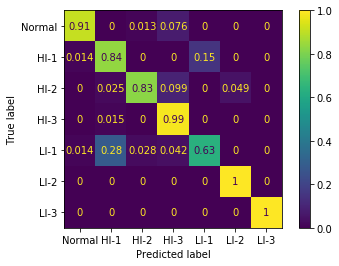

Rodada: 22 - seed: 6965

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99        78
        HI-1       0.60      0.73      0.66        83
        HI-2       0.94      0.77      0.85        79
        HI-3       0.93      0.94      0.93        84
        LI-1       0.59      0.53      0.56        81
        LI-2       0.93      1.00      0.96        52
        LI-3       1.00      1.00      1.00        62

    accuracy                           0.84       519
   macro avg       0.86      0.85      0.85       519
weighted avg       0.84      0.84      0.84       519



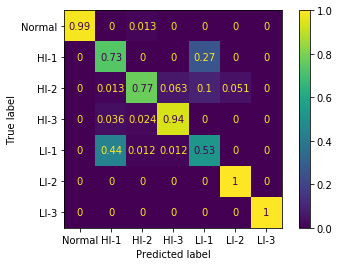

Rodada: 23 - seed: 6796

              precision    recall  f1-score   support

      Normal       0.86      0.95      0.91        66
        HI-1       0.67      0.87      0.76        67
        HI-2       0.97      0.80      0.88        79
        HI-3       0.87      0.94      0.90        79
        LI-1       0.84      0.65      0.73        78
        LI-2       0.99      0.97      0.98        77
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.88       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.89      0.88      0.88       519



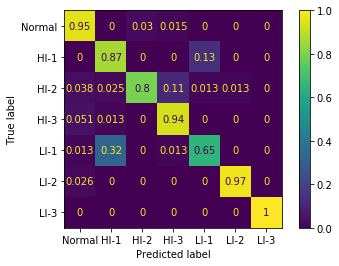

Rodada: 24 - seed: 344

              precision    recall  f1-score   support

      Normal       0.83      1.00      0.91        50
        HI-1       0.69      0.84      0.76        75
        HI-2       0.99      0.80      0.88        83
        HI-3       0.88      0.94      0.91        85
        LI-1       0.83      0.65      0.73        81
        LI-2       0.94      0.95      0.94        78
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.87       519
   macro avg       0.88      0.88      0.88       519
weighted avg       0.88      0.87      0.87       519



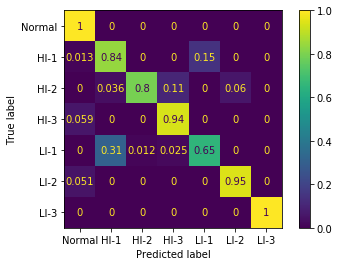

Rodada: 25 - seed: 4241

              precision    recall  f1-score   support

      Normal       0.89      0.96      0.92        68
        HI-1       0.70      0.83      0.76        78
        HI-2       0.96      0.63      0.76        75
        HI-3       0.82      1.00      0.90        77
        LI-1       0.82      0.62      0.71        79
        LI-2       0.88      0.99      0.93        69
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.86       519
   macro avg       0.87      0.86      0.85       519
weighted avg       0.86      0.86      0.85       519



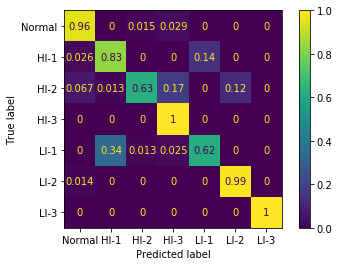

Rodada: 26 - seed: 3793

              precision    recall  f1-score   support

      Normal       0.86      0.92      0.89        64
        HI-1       0.70      0.92      0.79        77
        HI-2       0.95      0.82      0.88        68
        HI-3       0.89      0.90      0.90        84
        LI-1       0.92      0.60      0.73        81
        LI-2       0.91      0.99      0.95        73
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.88       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.89      0.88      0.87       519



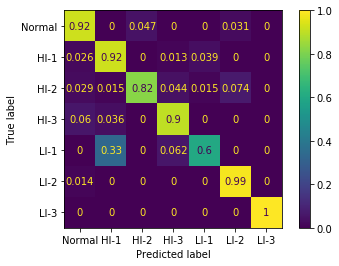

Rodada: 27 - seed: 2365

              precision    recall  f1-score   support

      Normal       0.93      0.96      0.94        77
        HI-1       0.76      0.79      0.78        86
        HI-2       0.87      0.79      0.83        78
        HI-3       0.80      0.83      0.82        59
        LI-1       0.78      0.66      0.71        76
        LI-2       0.87      1.00      0.93        75
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.86       519
   macro avg       0.86      0.86      0.86       519
weighted avg       0.86      0.86      0.86       519



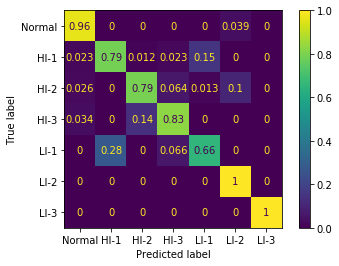

Rodada: 28 - seed: 3555

              precision    recall  f1-score   support

      Normal       0.88      0.93      0.91        72
        HI-1       0.70      0.85      0.77        79
        HI-2       0.95      0.75      0.84        72
        HI-3       0.93      0.80      0.86        71
        LI-1       0.79      0.71      0.74        68
        LI-2       0.87      1.00      0.93        76
        LI-3       1.00      1.00      1.00        81

    accuracy                           0.87       519
   macro avg       0.87      0.86      0.86       519
weighted avg       0.87      0.87      0.87       519



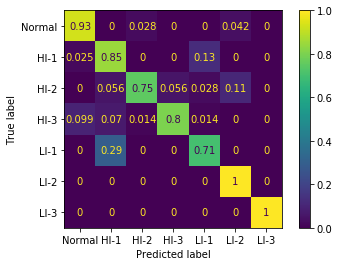

Rodada: 29 - seed: 7399

              precision    recall  f1-score   support

      Normal       0.87      0.95      0.91        63
        HI-1       0.76      0.81      0.78        67
        HI-2       0.87      0.69      0.77        75
        HI-3       0.89      0.85      0.87        93
        LI-1       0.72      0.70      0.71        66
        LI-2       0.86      1.00      0.93        69
        LI-3       1.00      1.00      1.00        86

    accuracy                           0.86       519
   macro avg       0.85      0.86      0.85       519
weighted avg       0.86      0.86      0.86       519



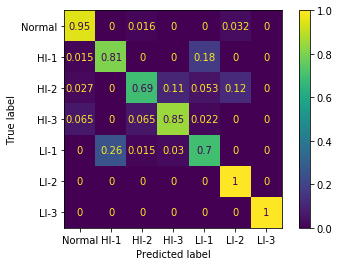

In [3]:
TARGET_LABELS = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

fs20_df = pd.read_csv('./csvs/fs20.csv')

y = fs20_df.pop('target').values
X = fs20_df.values

random_seeds = np.random.randint(0, 8000, 30)
print(f'seeds: {random_seeds}')

acc_por_rodada = []
freq_scores_df = []

for rodada, seed in enumerate(random_seeds):
    # Distribuindo os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Instanciando e treinando classificador
    classifier = make_pipeline(
        StandardScaler(),
        SVC(cache_size=500)
        ).fit(
            X_train,
            y_train)

    # Realizando predição
    y_pred = classifier.predict(X_test)

    # Retorna a ultima coluna da matriz, que contém as frequências
    freq_test = X_test[:,-1]

    freq_df = pd.DataFrame(
        data=[freq_test, y_test, y_pred],
        index=['freq', 'true', 'pred']
        ).transpose()

    score_dict = {}

    for freq, df in freq_df.groupby('freq'):
        score_dict[f'freq_{freq}_support'] = len(df)
        score_dict[f'freq_{freq}_acc'] = accuracy_score(y_true=df['true'].values,
                                                        y_pred=df['pred'].values)
    
    # Adicionando resultados à respectiva lista
    acc_por_rodada.append(accuracy_score(y_true=y_test, y_pred=y_pred))
    freq_scores_df.append(pd.DataFrame(score_dict, index=[rodada]))

    # Exibindo resultados
    print(f'Rodada: {rodada} - seed: {seed}\n')

    print(classification_report(y_test, y_pred, target_names=TARGET_LABELS))
    
    plot_confusion_matrix(
        estimator=classifier,
        X=X_test,
        y_true=y_test,
        normalize='true',
        display_labels=TARGET_LABELS
    )
    plt.show()

In [5]:
acc_s = pd.Series(data=acc_por_rodada, name='Acurácia')

acc_s.to_frame().style.hide_index().background_gradient(cmap='Blues')

Acurácia
0.874759
0.876686
0.870906
0.853565
0.855491
0.870906
0.859345
0.868979
0.842004
0.872832


count    30.000000
mean      0.870392
std       0.013252
min       0.838150
25%       0.861272
50%       0.870906
75%       0.876686
max       0.894027
Name: Acurácia, dtype: float64

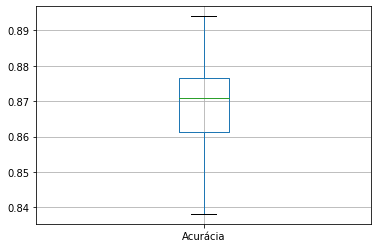

In [6]:
acc_s.to_frame().boxplot()
acc_s.describe()

In [7]:
freq_df = pd.concat(freq_scores_df, ignore_index=True)

acc_columns = [col for col in freq_df.columns if 'acc' in col]
sup_columns = [col for col in freq_df.columns if 'support' in col]

freq_accs = freq_df[acc_columns]
freq_sups = freq_df[sup_columns]

In [11]:
freq_accs

,freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
0,0.815789,0.760000,0.845070,0.984375,0.972603,0.935065,0.831325
1,0.826087,0.797297,0.875000,0.961039,0.974359,0.918919,0.773333
2,0.876712,0.780220,0.861111,0.972222,0.913043,0.965116,0.696429
3,0.821918,0.774648,0.915493,0.926471,0.848101,0.924051,0.769231
4,0.716216,0.774194,0.841463,0.948276,0.884058,0.928571,0.881579
5,0.851351,0.813333,0.787500,0.955224,0.947368,0.927711,0.812500
6,0.658537,0.819444,0.857143,0.916667,0.955882,0.936842,0.880597
7,0.800000,0.782609,0.893333,0.958904,0.916667,0.951220,0.771084
8,0.760563,0.760563,0.820513,0.941176,0.880000,0.898876,0.820896
9,0.837500,0.802817,0.829268,0.953125,0.915493,0.937500,0.845070


,freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.812798,0.802164,0.854407,0.960024,0.916238,0.935295,0.807248
std,0.059043,0.036331,0.031110,0.021457,0.032923,0.020489,0.049424
min,0.658537,0.742424,0.787500,0.916667,0.848101,0.891892,0.696429
25%,0.785036,0.775016,0.833955,0.946528,0.900000,0.924288,0.771647
50%,0.824002,0.795909,0.852040,0.957738,0.913839,0.934565,0.820170
75%,0.850746,0.826812,0.870617,0.975198,0.942650,0.944756,0.835573
max,0.925373,0.905405,0.915493,1.000000,0.974359,1.000000,0.881579


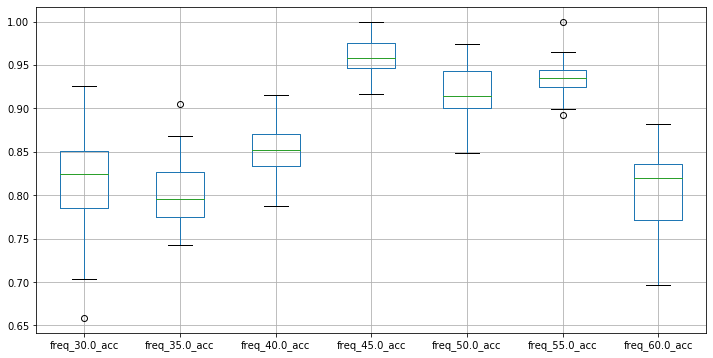

In [10]:
freq_accs.boxplot(figsize=(12, 6))
freq_accs.describe()

In [12]:
freq_sups

,freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
0,76,75,71,64,73,77,83
1,69,74,72,77,78,74,75
2,73,91,72,72,69,86,56
3,73,71,71,68,79,79,78
4,74,62,82,58,69,98,76
5,74,75,80,67,76,83,64
6,82,72,63,72,68,95,67
7,65,69,75,73,72,82,83
8,71,71,78,68,75,89,67
9,80,71,82,64,71,80,71


,freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,72.733333,74.366667,75.900000,71.766667,71.400000,81.200000,71.633333
std,6.982408,6.456664,8.272722,6.801031,5.875724,8.146927,6.820271
min,57.000000,62.000000,63.000000,58.000000,56.000000,67.000000,56.000000
25%,67.250000,71.000000,71.000000,68.000000,69.000000,75.500000,67.000000
50%,73.000000,74.500000,76.000000,71.500000,71.000000,80.500000,72.500000
75%,78.500000,77.750000,80.000000,75.500000,75.000000,86.000000,77.500000
max,84.000000,91.000000,101.000000,86.000000,82.000000,98.000000,83.000000


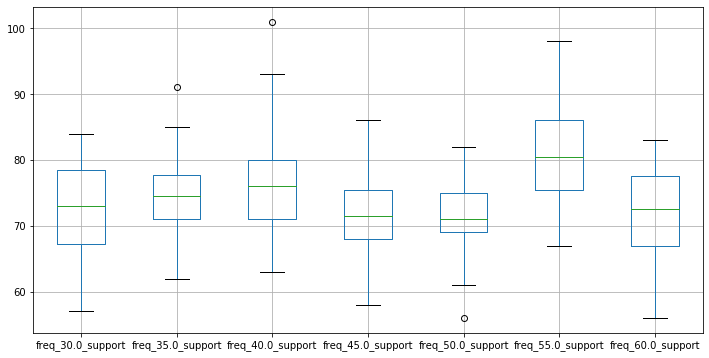

In [13]:
freq_sups.boxplot(figsize=(12, 6))
freq_sups.describe()